# OBJECTIVE : Netflix Stock Analysis
<b>1. Volume of Stock Traded</b>

<b>2. Netflix Stock Price - High, Open, Close</b>

<b>3. Netflix Stock Price - Day, Month, Year Wise</b>

<b>4. Top - 5 Dates Highest Stock Price</b>

<b>5. Top - 5 Dates Lowest Stock Price</b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [5]:
data = pd.read_csv("NFLX.csv")

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
...,...,...,...,...,...,...,...
1002,2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
1003,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
1004,2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700


In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [11]:
sns.set(rc={'figure.figsize':(10,5)})

In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


Text(0.5, 1.0, 'Volume of Stock vs Time')

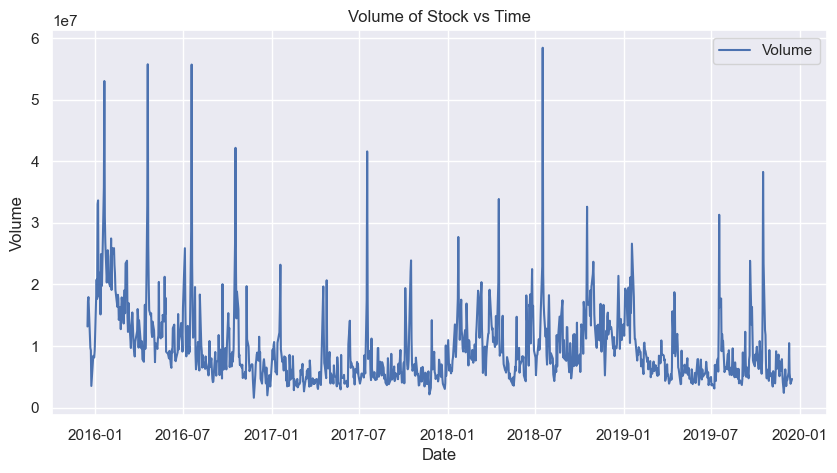

In [15]:
# (1) Volume of Stock Traded
sns.lineplot(x = data.index, y = data['Volume'], label = 'Volume')
plt.title('Volume of Stock vs Time')

<Axes: title={'center': 'Netflix stock price'}, xlabel='Date'>

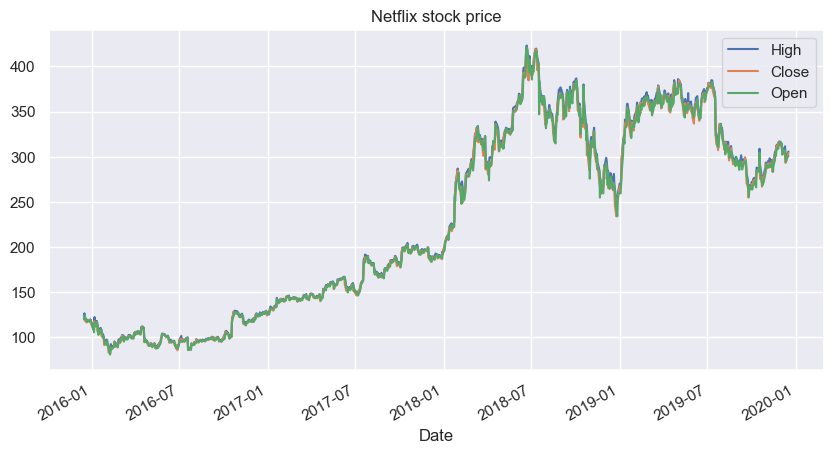

In [18]:
#(2) Netflix Stock Price - High, Open, Close

data.plot(y = ['High', 'Close', 'Open'], title = 'Netflix stock price')

<Axes: xlabel='Year'>

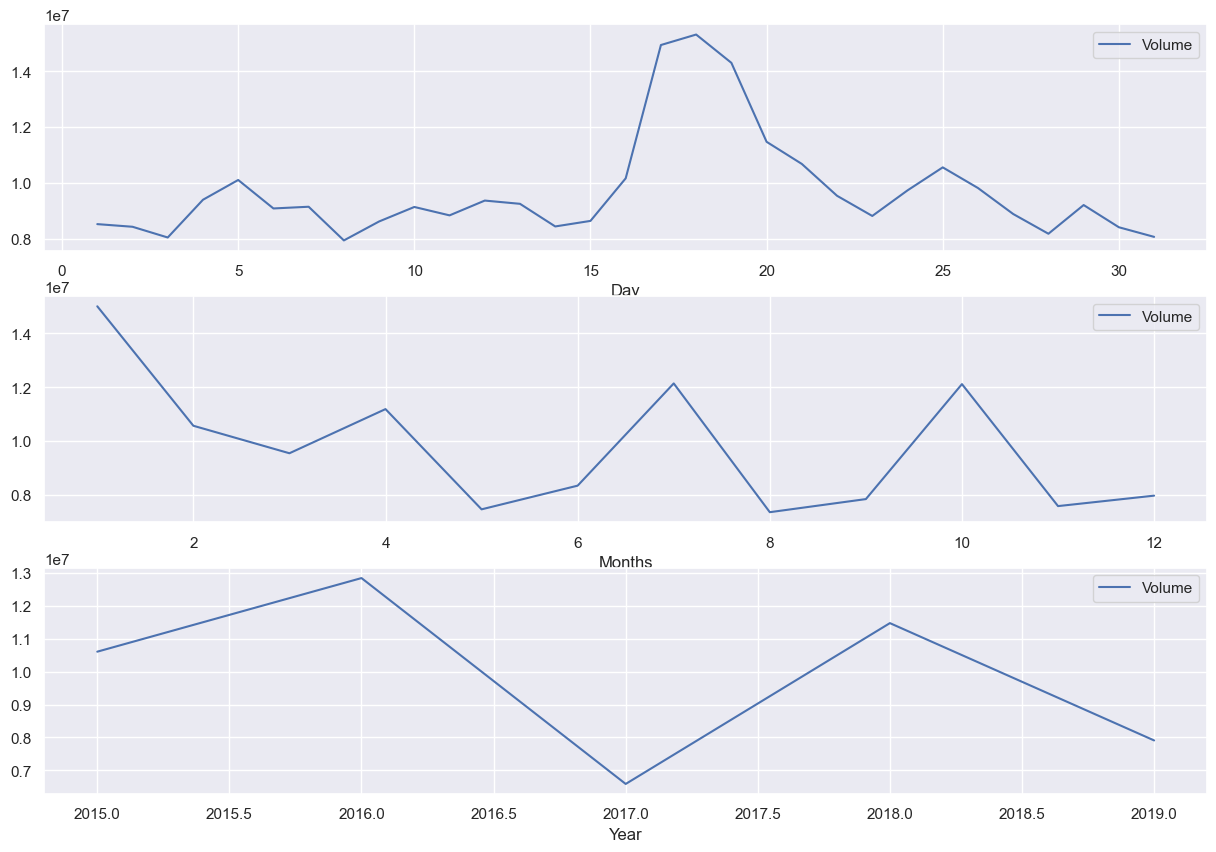

In [27]:
#(2) Netflix Stock Price - day, monthly,yearly

fig, (ax1, ax2 ,ax3) = plt.subplots(3, figsize = (15,10))
data.groupby(data.index.day).mean().plot(y = 'Volume',ax = ax1, xlabel = 'Day')
data.groupby(data.index.month).mean().plot(y = 'Volume',ax = ax2, xlabel = 'Months')
data.groupby(data.index.year).mean().plot(y = 'Volume',ax = ax3, xlabel = 'Year')

In [29]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
...,...,...,...,...,...,...
2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600


In [34]:
#4. Top - 5 Dates Highest Stock Price
A = data.sort_values(by = 'High', ascending = False).head(10)
A['High']

Date
2018-06-21    423.209991
2018-06-22    420.500000
2018-07-11    419.769989
2018-06-20    419.470001
2018-07-10    419.440002
2018-07-09    419.119995
2018-07-12    416.790009
2018-06-27    411.589996
2018-07-13    410.000000
2018-07-06    408.649994
Name: High, dtype: float64

In [35]:
#5. Top - 5 Dates Lowest Stock Price
B = data.sort_values(by = 'Low', ascending = True).head(10)
B['Low']

Date
2016-02-08    79.949997
2016-02-09    81.550003
2016-02-05    81.860001
2016-02-11    82.910004
2016-07-19    84.500000
2016-06-27    84.809998
2016-07-25    85.010002
2016-07-22    85.110001
2016-07-21    85.209999
2016-02-12    85.260002
Name: Low, dtype: float64

# High & Low values stock per period of time

<Axes: xlabel='Date', ylabel='Low'>

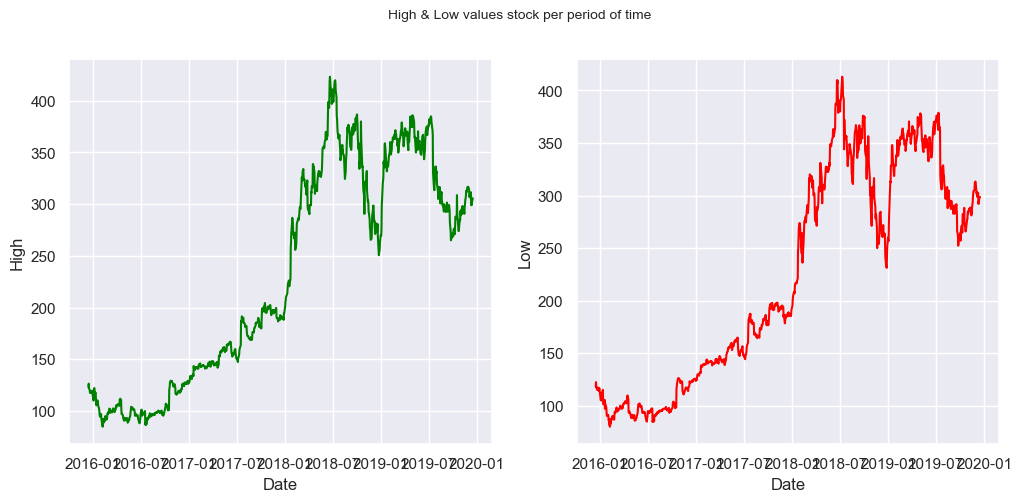

In [52]:
fig, axes = plt.subplots(nrows =1 , ncols =2, sharex = True, figsize = (12,5))
fig.suptitle('High & Low values stock per period of time', fontsize = 10)
sns.lineplot(ax = axes[0], y = data['High'], x = data.index, color = 'green' )
sns.lineplot(ax = axes[1], y = data['Low'], x = data.index, color = 'red')